Best parameters for Logistic Regression (Phytoplankton): {'C': 100}
Cross-Validation Accuracy Scores for Phytoplankton: [0.5940246  0.58626761 0.58274648 0.57570423 0.56514085]
Mean CV Accuracy for Phytoplankton: 0.5808
Standard Deviation of CV Accuracy for Phytoplankton: 0.0098
Phytoplankton Classification Report:
              precision    recall  f1-score   support

    Level 10       0.50      0.70      0.58        33
     Level 2       0.40      0.25      0.31         8
     Level 3       0.25      0.24      0.25        33
     Level 4       0.67      0.91      0.77       283
     Level 5       0.23      0.17      0.20        52
     Level 6       0.44      0.31      0.37       108
     Level 7       0.00      0.00      0.00        71
     Level 8       0.22      0.23      0.23        43
     Level 9       0.52      0.51      0.52        80

    accuracy                           0.54       711
   macro avg       0.36      0.37      0.36       711
weighted avg       0.46      0.54

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


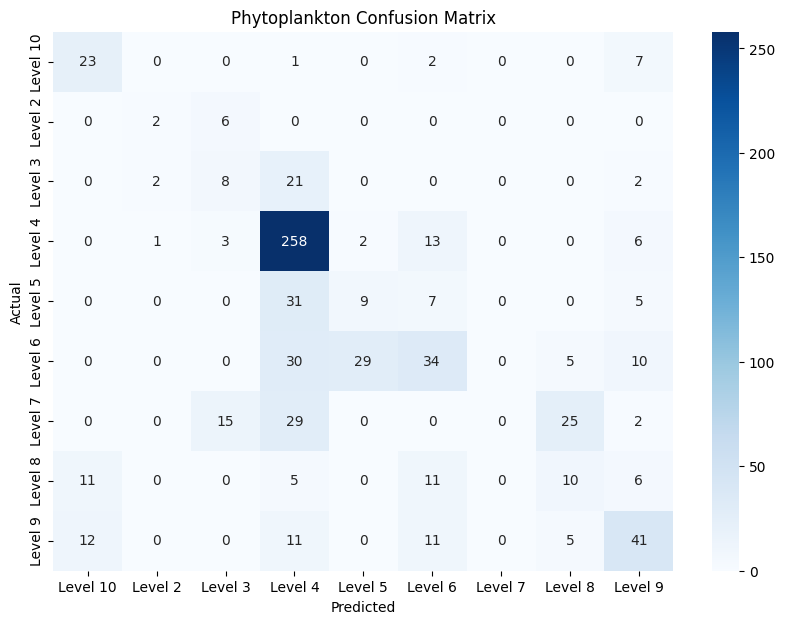

Best parameters for Logistic Regression (Zooplankton): {'C': 1}
Cross-Validation Accuracy Scores for Zooplankton: [0.49384886 0.5193662  0.48415493 0.48415493 0.54225352]
Mean CV Accuracy for Zooplankton: 0.5048
Standard Deviation of CV Accuracy for Zooplankton: 0.0227
Zooplankton Classification Report:
              precision    recall  f1-score   support

    Level 10       0.92      1.00      0.96        12
     Level 2       0.66      0.85      0.75       133
     Level 3       0.47      0.55      0.51        31
     Level 4       0.64      0.32      0.43        77
     Level 5       0.60      0.24      0.34        50
     Level 6       0.27      0.14      0.18        57
     Level 7       0.48      0.48      0.48       164
     Level 8       0.34      0.58      0.43       122
     Level 9       0.33      0.14      0.20        65

    accuracy                           0.49       711
   macro avg       0.52      0.48      0.47       711
weighted avg       0.49      0.49      0.47  

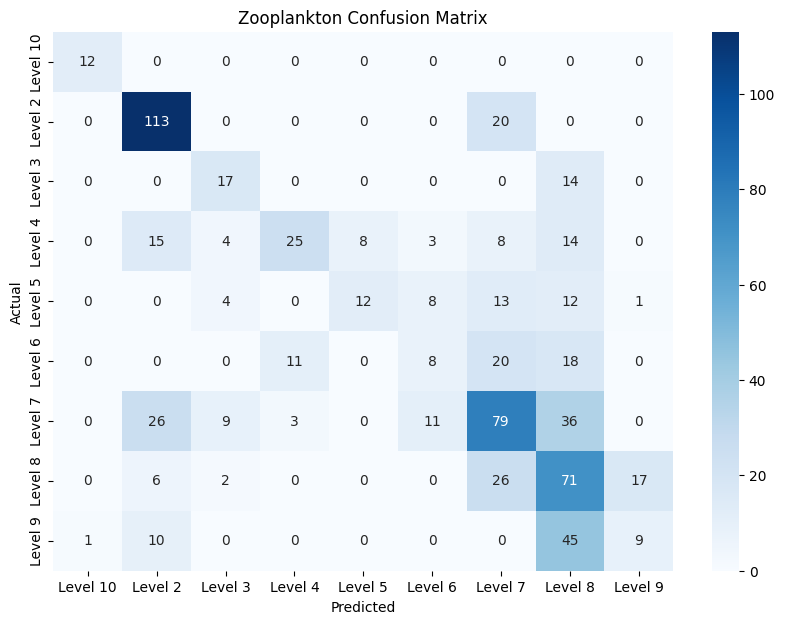

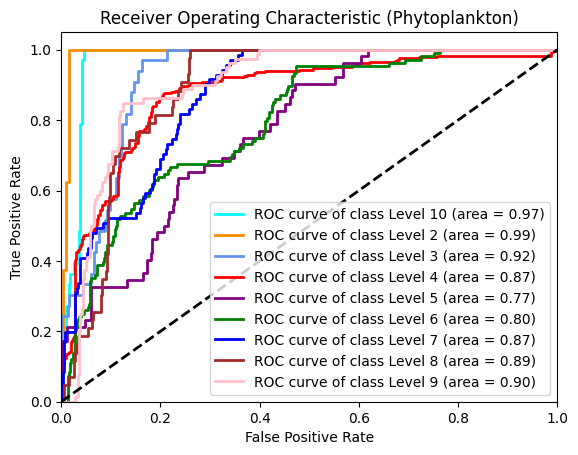

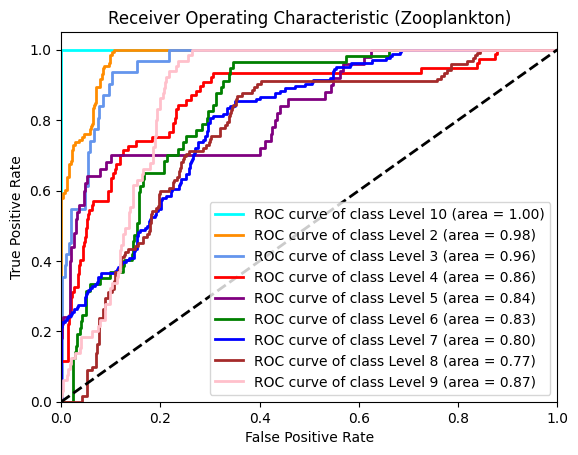

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder, StandardScaler, label_binarize
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, roc_curve, auc
import seaborn as sns
import matplotlib.pyplot as plt
from itertools import cycle

# Load the dataset from the CSV file
df = pd.read_csv('3500leveling.csv')

# Features
X = df[['Temp', 'pH', 'TDS', 'Turbidity', 'DO']]

# Labels
y_phyto = df['Phytoplankton']
y_zoo = df['Zooplankton']

# Encode the labels
le_phyto = LabelEncoder()
le_zoo = LabelEncoder()
y_phyto_encoded = le_phyto.fit_transform(y_phyto)
y_zoo_encoded = le_zoo.fit_transform(y_zoo)

# Binarize the labels for ROC curve
y_phyto_binarized = label_binarize(y_phyto_encoded, classes=range(len(le_phyto.classes_)))
y_zoo_binarized = label_binarize(y_zoo_encoded, classes=range(len(le_zoo.classes_)))

# Split the data into training and testing sets
X_train, X_test, y_phyto_train, y_phyto_test, y_zoo_train, y_zoo_test = train_test_split(
    X, y_phyto_encoded, y_zoo_encoded, test_size=0.2, random_state=42
)

# Scale the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialize the Logistic Regression classifier
log_reg = LogisticRegression(max_iter=1000, random_state=42, multi_class='ovr')

# Hyperparameter tuning for Logistic Regression using GridSearchCV
log_reg_param_grid = {'C': [0.01, 0.1, 1, 10, 100]}
log_reg_grid_search = GridSearchCV(log_reg, log_reg_param_grid, cv=5, scoring='accuracy')
log_reg_grid_search.fit(X_train, y_phyto_train)
best_log_reg_phyto = log_reg_grid_search.best_estimator_
print(f"Best parameters for Logistic Regression (Phytoplankton): {log_reg_grid_search.best_params_}")

# Train the best Logistic Regression model on the entire training data
best_log_reg_phyto.fit(X_train, y_phyto_train)

# Perform cross-validation for Phytoplankton
phyto_cv_scores = cross_val_score(best_log_reg_phyto, X_train, y_phyto_train, cv=5, scoring='accuracy')
print(f"Cross-Validation Accuracy Scores for Phytoplankton: {phyto_cv_scores}")
print(f"Mean CV Accuracy for Phytoplankton: {phyto_cv_scores.mean():.4f}")
print(f"Standard Deviation of CV Accuracy for Phytoplankton: {phyto_cv_scores.std():.4f}")

# Predict and evaluate for Phytoplankton
y_phyto_pred = best_log_reg_phyto.predict(X_test)
print("Phytoplankton Classification Report:")
print(classification_report(y_phyto_test, y_phyto_pred, target_names=le_phyto.classes_))
print("Phytoplankton Accuracy:", accuracy_score(y_phyto_test, y_phyto_pred))

# Confusion matrix for Phytoplankton
cm_phyto = confusion_matrix(y_phyto_test, y_phyto_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(cm_phyto, annot=True, fmt='d', cmap='Blues', xticklabels=le_phyto.classes_, yticklabels=le_phyto.classes_)
plt.title('Phytoplankton Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Hyperparameter tuning for Logistic Regression (Zooplankton)
log_reg_grid_search.fit(X_train, y_zoo_train)
best_log_reg_zoo = log_reg_grid_search.best_estimator_
print(f"Best parameters for Logistic Regression (Zooplankton): {log_reg_grid_search.best_params_}")

# Train the best Logistic Regression model on the entire training data for Zooplankton
best_log_reg_zoo.fit(X_train, y_zoo_train)

# Perform cross-validation for Zooplankton
zoo_cv_scores = cross_val_score(best_log_reg_zoo, X_train, y_zoo_train, cv=5, scoring='accuracy')
print(f"Cross-Validation Accuracy Scores for Zooplankton: {zoo_cv_scores}")
print(f"Mean CV Accuracy for Zooplankton: {zoo_cv_scores.mean():.4f}")
print(f"Standard Deviation of CV Accuracy for Zooplankton: {zoo_cv_scores.std():.4f}")

# Predict and evaluate for Zooplankton
y_zoo_pred = best_log_reg_zoo.predict(X_test)
print("Zooplankton Classification Report:")
print(classification_report(y_zoo_test, y_zoo_pred, target_names=le_zoo.classes_))
print("Zooplankton Accuracy:", accuracy_score(y_zoo_test, y_zoo_pred))

# Confusion matrix for Zooplankton
cm_zoo = confusion_matrix(y_zoo_test, y_zoo_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(cm_zoo, annot=True, fmt='d', cmap='Blues', xticklabels=le_zoo.classes_, yticklabels=le_zoo.classes_)
plt.title('Zooplankton Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Binarize the test labels for ROC curve
y_phyto_test_binarized = label_binarize(y_phyto_test, classes=range(len(le_phyto.classes_)))
y_zoo_test_binarized = label_binarize(y_zoo_test, classes=range(len(le_zoo.classes_)))

# ROC Curve for Phytoplankton
y_phyto_score = best_log_reg_phyto.predict_proba(X_test)

fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(len(le_phyto.classes_)):
    fpr[i], tpr[i], _ = roc_curve(y_phyto_test_binarized[:, i], y_phyto_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curve for Phytoplankton
plt.figure()
colors = cycle(['aqua', 'darkorange', 'cornflowerblue', 'red', 'purple', 'green', 'blue', 'brown', 'pink'])
for i, color in zip(range(len(le_phyto.classes_)), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(le_phyto.classes_[i], roc_auc[i]))
plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (Phytoplankton)')
plt.legend(loc="lower right")
plt.show()

# ROC Curve for Zooplankton
y_zoo_score = best_log_reg_zoo.predict_proba(X_test)

fpr_zoo = dict()
tpr_zoo = dict()
roc_auc_zoo = dict()
for i in range(len(le_zoo.classes_)):
    fpr_zoo[i], tpr_zoo[i], _ = roc_curve(y_zoo_test_binarized[:, i], y_zoo_score[:, i])
    roc_auc_zoo[i] = auc(fpr_zoo[i], tpr_zoo[i])

# Plot ROC curve for Zooplankton
plt.figure()
for i, color in zip(range(len(le_zoo.classes_)), colors):
    plt.plot(fpr_zoo[i], tpr_zoo[i], color=color, lw=2,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(le_zoo.classes_[i], roc_auc_zoo[i]))
plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (Zooplankton)')
plt.legend(loc="lower right")
plt.show()
